<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 8</h3>
    <h3>Ejercicio 1</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno Y Braian Drago <p>
</div>

# Chronos

Caso 1

In [ ]:
!pip install PyPDF2 pymupdf vaderSentiment
'''
Breve explicacion
PyPDF2 : trabaja con archivos PDF
pymupdf : Trabaja con PDF, XPS, OpenXPS, CBZ, y EPUB.
vaderSentiment Hace análisis de sentimientos.  ( calcular el sentimiento de textos. Buena para analizar sentimientos en textos breves, como tweets y reseñas. )
'''

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.0 MB/s eta 0:00:00


'\nBreve explicacion\nPyPDF2 : trabaja con archivos PDF\npymupdf : Trabaja con PDF, XPS, OpenXPS, CBZ, y EPUB.\nvaderSentiment Hace análisis de sentimientos.  ( calcular el sentimiento de textos. Buena para analizar sentimientos en textos breves, como tweets y reseñas. )\n'

In [ ]:
!wget https://github.com/nickmccarty/beige-book-data/raw/main/beige-book-corpus-and-sentiment.csv

'''
Aqui se baja el archivo beige-book-corpus-and-sentiment.csv desde GitHub y lo guarda.
'''

--2024-11-12 19:10:04--  https://github.com/nickmccarty/beige-book-data/raw/main/beige-book-corpus-and-sentiment.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nickmccarty/beige-book-data/main/beige-book-corpus-and-sentiment.csv [following]
--2024-11-12 19:10:05--  https://raw.githubusercontent.com/nickmccarty/beige-book-data/main/beige-book-corpus-and-sentiment.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29731533 (28M) [text/plain]
Saving to: ‘beige-book-corpus-and-sentiment.csv’

beige-book-corpus-a 100%[===================>]  28.35M  --.-KB/s    in 0.1s    

2024-11-12 19:10:06 (

'\nAqui se baja el archivo beige-book-corpus-and-sentiment.csv desde GitHub y lo guarda.\n'

In [ ]:
! pip install git+https://github.com/amazon-science/chronos-forecasting.git

# Se requiere tipo de tiempo de ejecución de GPU

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-vxjpu3p_
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-vxjpu3p_
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit ac6ee36acee1e47446cd66f72f540c87f1f1fbe4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for chronos: filename=chronos-1.2.1-py3-none-any.whl size=13927 sha256=629a4e650d11585141273be4a3316367ce777c78590cf2e520128d8466e322cb
  Stored in directory: /tmp/pip-ephem-wheel-cache-els_09j3/wheels/bf/c1/65/08857e57345ef1b34ba0edb4791f1b2594943e82f34e93a4ab
Successfully built chronos


In [ ]:
## Librerias
import yfinance as yf
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Parametros
pipeline = ChronosPipeline.from_pretrained(
    #"amazon/chronos-t5-small",
    "amazon/chronos-t5-large",
    device_map="cuda",  # "cpu" o "mps" para Apple Silicon
    torch_dtype=torch.bfloat16,
)


'''
Breves comentarios, aquí se inicializa una instancia ChronosPipeline usando un modelo preentrenado.
A su vez, cuda significa que vamos a usar la GPU para acelerar el procesamiento.
torch.bfloat16:  sirve para acelerar el procesamiento sin una gran pérdida de precisión.
'''

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

'\nBreves comentarios, aquí se inicializa una instancia ChronosPipeline usando un modelo preentrenado.\nA su vez, cuda significa que vamos a usar la GPU para acelerar el procesamiento.\ntorch.bfloat16:  sirve para acelerar el procesamiento sin una gran pérdida de precisión.\n'


Modelo	 (Parametros)

-chronos-t5-tiny	(8M - Ej: Tiene 8 millones de parametros)
-chronos-t5-mini	(20M) <br>
-chronos-t5-small	(46M)	<br>
-chronos-t5-base	(200M) <br>
-chronos-t5-large	(710M)

In [ ]:
## Cargamos los datos
msft = yf.Ticker("MSFT")

hist = msft.history(period="2y").reset_index().rename(columns={'Date':'ds','Open':'y'})
hist['ds'] = hist['ds'].dt.strftime('%Y-%m-%d')
hist['cap']=hist.y.rolling(window=5).mean().fillna(method='bfill')*1.20
hist['floor']=hist.y.rolling(window=5).mean().fillna(method='bfill')*0.80

'''
Renombra las columnas "Date" a "ds" y "Open" a "y" para que sean compatibles con el formato esperado.
'''

'\nRenombra las columnas "Date" a "ds" y "Open" a "y" para que sean compatibles con el formato esperado.\n'

In [ ]:
## Parametros de prediccion
step_to_predict= 30  # Da la cantidad de pasos hacia adelante que vamos a predecir
samples_to_consider= 50 # Da cuántos puntos de datos históricos se deben considerar al hacer la predicción.

In [ ]:
## Proyeccion
forecast = pipeline.predict(
    context=torch.tensor(hist["y"]),
    prediction_length=step_to_predict,
    num_samples=samples_to_consider,
)

forecast_index = range(len(hist), len(hist) + step_to_predict)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

In [ ]:
hist

,ds,y,High,Low,Close,Volume,Dividends,Stock Splits,cap,floor
0,2022-11-14,237.888967,239.776426,235.156081,237.456421,31123300,0.00,0.0,286.368139,190.912092
1,2022-11-15,241.496761,242.814048,235.962168,237.869293,31390100,0.00,0.0,286.368139,190.912092
2,2022-11-16,239.348010,240.343701,237.011614,238.303040,24093300,0.68,0.0,286.368139,190.912092
3,2022-11-17,234.409034,239.801488,234.261167,238.253738,23123500,0.00,0.0,286.368139,190.912092
4,2022-11-18,240.057806,240.284556,235.641322,237.800278,27613500,0.00,0.0,286.368139,190.912092
...,...,...,...,...,...,...,...,...,...,...
497,2024-11-06,412.420013,420.450012,410.519989,420.179993,26681800,0.00,0.0,493.190398,328.793599
498,2024-11-07,421.279999,426.850006,419.880005,425.429993,19901800,0.00,0.0,494.611201,329.740801
499,2024-11-08,425.320007,426.500000,421.779999,422.540009,16891400,0.00,0.0,498.525601,332.350400
500,2024-11-11,422.519989,424.809998,416.000000,418.010010,24473800,0.00,0.0,501.578401,334.385601


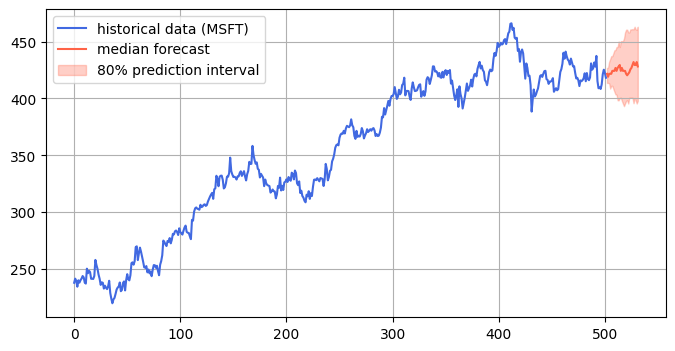

In [ ]:
# Grafico
plt.figure(figsize=(8, 4))
plt.plot(hist["y"], color="royalblue", label="historical data (MSFT)")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

Caso 2

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
import re
import fitz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Las proximas lineas se usan para descargar recursos necesarios para el procesamiento del lenguaje natural.

nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

sentiment_score_vader es el puntaje obtenido por un texto al ser analizado , que calcula un valor de sentimiento que indica si el texto es positivo, negativo o neutral, y con qué fuerza.

In [ ]:
df = pd.read_csv('beige-book-corpus-and-sentiment.csv', index_col = 0)
df

,report_date,district,sentence,sentiment_score_vader,year
0,2011-01-12,Summary,SummaryPrepared at the Federal Reserve Bank of...,0.0000,2011
1,2011-01-12,Summary,This document summarizes comments received fro...,0.0000,2011
2,2011-01-12,Summary,Reports from the twelve Federal Reserve Distri...,0.3182,2011
3,2011-01-12,Summary,Conditions were said to be improving in the Bo...,0.4215,2011
4,2011-01-12,Summary,Activity increased modestly to moderately in t...,0.2732,2011
...,...,...,...,...,...
182620,2023-11-29,San Francisco,Financial Institutions Lending activity weaken...,-0.3182,2023
182621,2023-11-29,San Francisco,High financing costs pushed more firms to dela...,-0.5520,2023
182622,2023-11-29,San Francisco,Demand for mortgages remained muted as higher ...,-0.3400,2023
182623,2023-11-29,San Francisco,"In contrast, consumer lending was solid, and r...",0.5168,2023


In [ ]:
df['year'] = df['report_date'].apply(lambda x: x[:4])

'''
Extrae los primeros 4 caracteres de cada fecha en report_date.
'''

'\nExtrae los primeros 4 caracteres de cada fecha en report_date.\n'

In [ ]:
mean_sentiment_df = df.groupby(['year', 'district'])['sentiment_score_vader'].mean().to_frame().reset_index()
mean_sentiment_df

,year,district,sentiment_score_vader
0,2011,Atlanta,0.090977
1,2011,Boston,0.121728
2,2011,Chicago,0.119057
3,2011,Cleveland,0.089874
4,2011,Dallas,0.145088
...,...,...,...
164,2023,Philadelphia,0.100397
165,2023,Richmond,0.095668
166,2023,San Francisco,0.093860
167,2023,St. Louis,0.100822


In [ ]:
mean_sentiment_df[mean_sentiment_df['district'] == 'Philadelphia']

,year,district,sentiment_score_vader
8,2011,Philadelphia,0.152007
21,2012,Philadelphia,0.208434
34,2013,Philadelphia,0.247456
47,2014,Philadelphia,0.225849
60,2015,Philadelphia,0.245460
73,2016,Philadelphia,0.237379
86,2017,Philadelphia,0.191097
99,2018,Philadelphia,0.171689
112,2019,Philadelphia,0.134656
125,2020,Philadelphia,0.045367


In [ ]:
dates = [date for date in sorted(list(set(df['report_date'])))]

# Obtenemos  una lista ordenada de fechas únicas.

In [ ]:
df[(df['district'] == 'Philadelphia') & (df['report_date'] == dates[3])].iloc[1]['sentence']

'''
Aqui se seleccionan las filas donde district es Philadelphia y el report_date es igual a la cuarta fecha de la lista creada previamente.
A su vez, elige la segunda fila del DataFrame filtrado y obtiene el valor de la columna sentence de esa fila específica.
'''

'\nAqui se seleccionan las filas donde district es Philadelphia y el report_date es igual a la cuarta fecha de la lista creada previamente.\nA su vez, elige la segunda fila del DataFrame filtrado y obtiene el valor de la columna sentence de esa fila específica.\n'

In [ ]:
summary_df = df[df['district'] == 'Summary']
summary_df = summary_df.groupby('report_date')['sentiment_score_vader'].mean().to_frame().reset_index()
summary_df['% Change'] = summary_df['sentiment_score_vader'].pct_change()
summary_df

,report_date,sentiment_score_vader,% Change
0,2011-01-12,0.093540,NaN
1,2011-03-02,0.133328,0.425352
2,2011-04-13,0.131985,-0.010072
3,2011-06-08,0.223962,0.696879
4,2011-07-27,0.153084,-0.316475
...,...,...,...
98,2023-04-19,0.142767,0.055573
99,2023-07-12,0.086135,-0.396677
100,2023-09-06,0.148910,0.728805
101,2023-10-18,0.106480,-0.284937


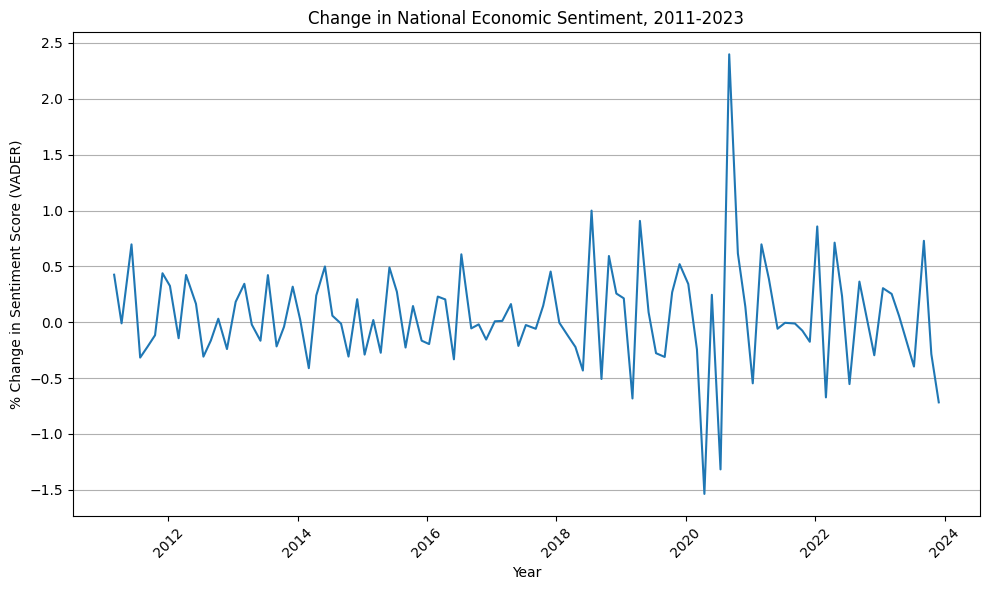

In [ ]:
# Convertir report_date a formato datetime
summary_df['report_date'] = pd.to_datetime(summary_df['report_date'])

plt.figure(figsize=(10, 6))
plt.plot(summary_df['report_date'], summary_df['% Change'], linestyle='-')
plt.title('Change in National Economic Sentiment, 2011-2023')
plt.xlabel('Year')
plt.ylabel('% Change in Sentiment Score (VADER)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

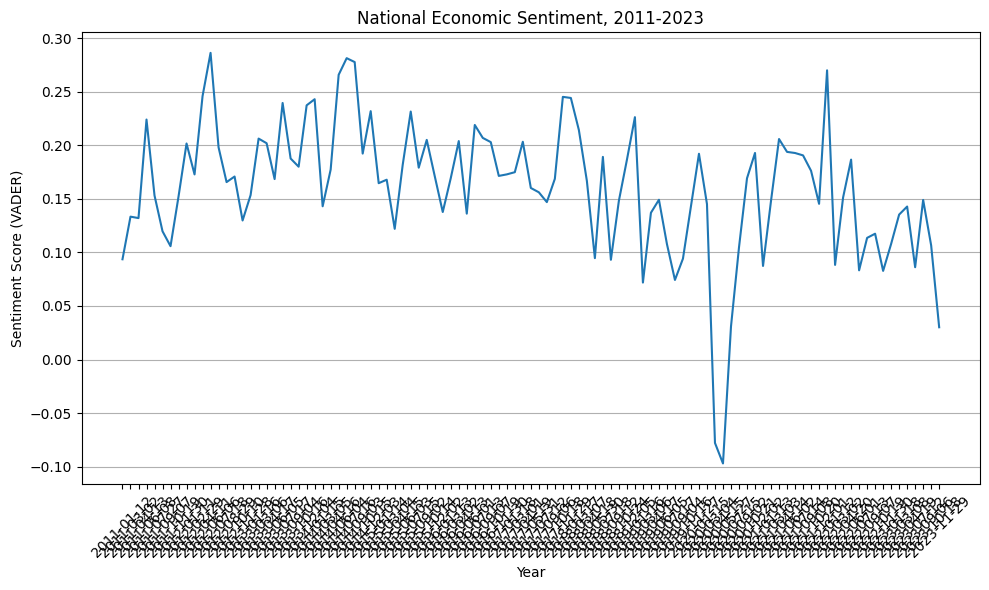

In [ ]:
# Filtrar registros con "Resumen" en la columna del distrito
summary_df = df[df['district'] == 'Summary']

# Agrupe por report_date y calcule la media de sentiment_score_vader para cada fecha
grouped_df = summary_df.groupby('report_date')['sentiment_score_vader'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped_df['report_date'], grouped_df['sentiment_score_vader'], linestyle='-')
plt.title('National Economic Sentiment, 2011-2023')
plt.xlabel('Year')
plt.ylabel('Sentiment Score (VADER)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
summary_df = summary_df[summary_df['sentiment_score_vader'] != 0.0]
summary_df['% Change'] = summary_df['sentiment_score_vader'].pct_change()
summary_df.dropna(inplace=True)

summary_df

'''
Elimina las filas donde sentiment_score_vader es igual a 0.0.
Añade una columna que muestra el cambio porcentual en sentiment_score_vader.
Elimina filas con valores NaN después de calcular los cambios porcentuales.
'''

'\nElimina las filas donde sentiment_score_vader es igual a 0.0.\nAñade una columna que muestra el cambio porcentual en sentiment_score_vader.\nElimina filas con valores NaN después de calcular los cambios porcentuales.\n'

In [ ]:
# aqui agrupamos los datos de summary_df por la columna report_date y calcula el promedio de los valores en la columna sentiment_score_vader para cada fecha

df = summary_df.groupby('report_date')['sentiment_score_vader'].mean().to_frame().reset_index()
df

,report_date,sentiment_score_vader
0,2011-01-12,0.122761
1,2011-03-02,0.182659
2,2011-04-13,0.166301
3,2011-06-08,0.269186
4,2011-07-27,0.193288
...,...,...
98,2023-04-19,0.226459
99,2023-07-12,0.127813
100,2023-09-06,0.222103
101,2023-10-18,0.163523


In [ ]:
report_dates = [row for row in df['report_date'].astype('str')]
report_dates

['2011-01-12',
 '2011-03-02',
 '2011-04-13',
 '2011-06-08',
 '2011-07-27',
 '2011-09-07',
 '2011-10-19',
 '2011-11-30',
 '2012-01-11',
 '2012-02-29',
 '2012-04-11',
 '2012-06-06',
 '2012-07-18',
 '2012-08-29',
 '2012-10-10',
 '2012-11-28',
 '2013-01-16',
 '2013-03-06',
 '2013-04-17',
 '2013-06-05',
 '2013-07-17',
 '2013-09-04',
 '2013-10-16',
 '2013-12-04',
 '2014-01-15',
 '2014-03-05',
 '2014-04-16',
 '2014-06-04',
 '2014-07-16',
 '2014-09-03',
 '2014-10-15',
 '2014-12-03',
 '2015-01-14',
 '2015-03-04',
 '2015-04-15',
 '2015-06-03',
 '2015-07-15',
 '2015-09-02',
 '2015-10-14',
 '2015-12-02',
 '2016-01-13',
 '2016-03-02',
 '2016-04-13',
 '2016-06-01',
 '2016-07-13',
 '2016-09-07',
 '2016-10-19',
 '2016-11-30',
 '2017-01-18',
 '2017-03-01',
 '2017-04-19',
 '2017-05-31',
 '2017-07-12',
 '2017-09-06',
 '2017-10-18',
 '2017-11-29',
 '2018-01-17',
 '2018-03-07',
 '2018-04-18',
 '2018-05-30',
 '2018-07-18',
 '2018-09-12',
 '2018-10-24',
 '2018-12-05',
 '2019-01-16',
 '2019-03-06',
 '2019-04-

In [ ]:
def read_pdf(file_path):
    doc = fitz.open(file_path)
    text = ''
    for page_num in range(doc.page_count):
        page = doc[page_num]
        text += page.get_text()
    return text

def get_report_date_from_filename(file_name):
    """
    Extrae la fecha del informe del nombre del archivo PDF utilizando el archivo proporcionado
    convenio de denominación.
    Por ejemplo, './data/beige-book-11-29-2023.pdf' -> '2023-11-29'
    """
    date_pattern = r'(\d{2})-(\d{2})-(\d{4})'
    match = re.search(date_pattern, file_name)
    if match:
        # Construya la fecha en formato "AAAA-MM-DD"
        return f"{match.group(3)}-{match.group(1)}-{match.group(2)}"
    return None

def preprocess_text(text):
    # Realizar preprocesamiento básico de texto
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'- ', '', text)
    return text

def calculate_sentiment_scores(text):
    # Iinicializar el analizador de sentimientos VADER
    analyzer = SentimentIntensityAnalyzer()

    # Calcular la puntuación de sentimiento para todo el texto.
    score = analyzer.polarity_scores(text)['compound']

    return score

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from datetime import datetime

def get_2024_beige_books():
  # URL de la pagina a scrapear
  url = "https://www.federalreserve.gov/monetarypolicy/publications/beige-book-default.htm"

  # Obtener el contenido HTML de la página.
  response = requests.get(url)
  html_content = response.content

  # Analizar el contenido HTML usando BeautifulSoup
  soup = BeautifulSoup(html_content, "html.parser")

  # Encuentre todas las etiquetas de anclaje que contengan enlaces PDF
  pdf_links = soup.find_all("a", href=lambda href: (href.endswith(".pdf") and "BeigeBook" in href))

  # Directorio para guardar archivos PDF descargados
  directory = "./data/"
  if not os.path.exists(directory):
      os.makedirs(directory)

  # Descargar archivos PDF
  for link in pdf_links:
      pdf_url = urljoin(url, link["href"])

      date_str = pdf_url.split("_")[1].split(".")[0]
      # Convertir cadena de fecha en objeto de fecha y hora
      date = datetime.strptime(date_str, "%Y%m%d")

      formatted_date = date.strftime("%m-%d-%Y")

      filename = f"beige-book-{formatted_date}.pdf"
      filepath = os.path.join(directory, filename)

      # descarga a PDF
      with open(filepath, "wb") as file:
          response = requests.get(pdf_url)
          file.write(response.content)

      print(f"Downloaded: {filename}")

  print("All PDFs downloaded successfully.")

get_2024_beige_books()

Downloaded: beige-book-01-17-2024.pdf
Downloaded: beige-book-03-06-2024.pdf
Downloaded: beige-book-04-17-2024.pdf
Downloaded: beige-book-05-29-2024.pdf
Downloaded: beige-book-07-17-2024.pdf
Downloaded: beige-book-09-04-2024.pdf
Downloaded: beige-book-10-23-2024.pdf
All PDFs downloaded successfully.


In [ ]:
# Directorio que contiene archivos PDF
directory = "./data/"

# Listar archivos en el directorio
file_names = os.listdir(directory)

# Filtre archivos que no sean PDF y cree rutas de archivos
file_paths = [os.path.join(directory, file_name) for file_name in file_names if file_name.endswith(".pdf")]

file_paths

['./data/beige-book-01-17-2024.pdf',
 './data/beige-book-07-17-2024.pdf',
 './data/beige-book-04-17-2024.pdf',
 './data/beige-book-03-06-2024.pdf',
 './data/beige-book-10-23-2024.pdf',
 './data/beige-book-05-29-2024.pdf',
 './data/beige-book-09-04-2024.pdf']

In [ ]:
report_dates_2024 = []

for file_name in file_names:
  report_dates_2024.append(get_report_date_from_filename(file_name))

  '''
Que hace ?
Crea una lista vacía para almacenar las fechas, recorre cada nombre de archivo en la lista file_names, usa una función para obtener la fecha del nombre del archivo y almacena cada fecha a la lista report_dates_2024.

  '''

In [ ]:
sorted(report_dates_2024)

['2024-01-17',
 '2024-03-06',
 '2024-04-17',
 '2024-05-29',
 '2024-07-17',
 '2024-09-04',
 '2024-10-23']

In [ ]:
national_summaries_2024_beige_books = []

dates = ['202401', '202402', '202404']

for date in dates:

  url = f"https://www.federalreserve.gov/monetarypolicy/beigebook{date}-summary.htm"


  response = requests.get(url)

  # Verifique si la solicitud fue exitosa (código de estado 200)
  if response.status_code == 200:

      soup = BeautifulSoup(response.content, "html.parser")

     # Encuentra el elemento <div> con id "artículo"
      article_div = soup.find("div", id="article")

      if article_div:
          # Extraemos todo el texto del elemento <div>
          article_text = article_div.get_text(separator="\n")

          national_summaries_2024_beige_books.append(article_text)


          print(article_text)
      else:
          print("The <div> element with id 'article' was not found.")
  else:
      print("Failed to retrieve the webpage. Status code:", response.status_code)







National Summary


Overall Economic Activity


A majority of the twelve Federal Reserve Districts reported little or no change in economic activity since the prior Beige Book period. Of the four Districts that differed, three reported modest growth and one reported a moderate decline. Consumers delivered some seasonal relief over the holidays by meeting expectations in most Districts and by exceeding expectations in three Districts, including in New York, which noted strong holiday spending on apparel, toys, and sporting goods. In addition, seasonal demand lifted airfreight volume from ecommerce in Richmond and credit card lending in Philadelphia. Several Districts noted increased leisure travel, and a tourism contact described New York City as bustling. Contacts from nearly all Districts reported decreases in manufacturing activity. Districts continued to note that high interest rates were limiting auto sales and real estate deals; however, the prospect of falling interest rates

In [ ]:
print(f"Longitud de report_dates_2024: {len(report_dates_2024)}")
print(f"Longitud de national_summaries_2024_beige_books: {len(national_summaries_2024_beige_books)}")


Longitud de report_dates_2024: 7
Longitud de national_summaries_2024_beige_books: 3


In [ ]:
report_dates_2024

['2024-01-17',
 '2024-07-17',
 '2024-04-17',
 '2024-03-06',
 '2024-10-23',
 '2024-05-29',
 '2024-09-04']

In [ ]:
# Fechas a eliminar. Preferentemente utilizar estas fechas pero las saco para velocidad del codigo
fechas_a_eliminar = ['2024-07-17', '2024-05-29','2024-10-23','2024-09-04']




# Eliminar las fechas específicas de la lista
report_dates_2024 = [date for date in report_dates_2024 if date not in fechas_a_eliminar]

# Crear el DataFrame con las listas truncadas
df2 = pd.DataFrame({
    'report_date': sorted(report_dates_2024),
    'summary': national_summaries_2024_beige_books
})


print(df2)


  report_date                                            summary
0  2024-01-17  \n\n\n\n\n\nNational Summary\n\n\nOverall Econ...
1  2024-03-06  \n\n\n\n\n\nNational Summary\n\n\nOverall Econ...
2  2024-04-17  \n\n\n\n\n\nNational Summary\n\n\nOverall Econ...


In [ ]:
df2['summary'] = df2['summary'].apply(lambda x: preprocess_text(x))
df2['summary'].apply(lambda x: calculate_sentiment_scores(x))

,summary
0,0.9987
1,0.9991
2,0.9974


In [ ]:
df2.iloc[0]['summary']

' National Summary Overall Economic Activity A majority of the twelve Federal Reserve Districts reported little or no change in economic activity since the prior Beige Book period. Of the four Districts that differed, three reported modest growth and one reported a moderate decline. Consumers delivered some seasonal relief over the holidays by meeting expectations in most Districts and by exceeding expectations in three Districts, including in New York, which noted strong holiday spending on apparel, toys, and sporting goods. In addition, seasonal demand lifted airfreight volume from ecommerce in Richmond and credit card lending in Philadelphia. Several Districts noted increased leisure travel, and a tourism contact described New York City as bustling. Contacts from nearly all Districts reported decreases in manufacturing activity. Districts continued to note that high interest rates were limiting auto sales and real estate deals; however, the prospect of falling interest rates was cit

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

def split_sentences(row):
    sentences = sent_tokenize(row['summary'])  # Tokeniza el texto en oraciones
    rows = [{'report_date': row['report_date'], 'sentence': sentence} for sentence in sentences]
    return pd.DataFrame(rows)

df2 = pd.concat(df2.apply(split_sentences, axis=1).tolist(), ignore_index=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
'''
Aqui dividimos el texto en oraciones y organizamos cada oración en una fila separada en un DataFrame de pandas.



def split_sentences(row):
    sentences = sent_tokenize(row['summary'])
    rows = [{'report_date': row['report_date'], 'sentence': sentence} for sentence in sentences]
    return pd.DataFrame(rows)

df2 = pd.concat(df2.apply(split_sentences, axis=1).tolist(), ignore_index=True)

df2

'''

"\nAqui dividimos el texto en oraciones y organizamos cada oración en una fila separada en un DataFrame de pandas.\n\n\n\ndef split_sentences(row):\n    sentences = sent_tokenize(row['summary'])\n    rows = [{'report_date': row['report_date'], 'sentence': sentence} for sentence in sentences]\n    return pd.DataFrame(rows)\n\ndf2 = pd.concat(df2.apply(split_sentences, axis=1).tolist(), ignore_index=True)\n\ndf2\n\n"

In [ ]:
df2['sentiment_score_vader']	= df2['sentence'].apply(lambda x: calculate_sentiment_scores(x))
df2


# Aqui toma cada columna sentence del dataFrame.
# usa la funcion calculate_sentiment_scores y se aplica a cada oración para tener el puntaje de sentimiento.
# almacena estos puntos en una nueva columna llamada sentiment_score_vader.



,report_date,sentence,sentiment_score_vader
0,2024-01-17,National Summary Overall Economic Activity A ...,-0.2315
1,2024-01-17,"Of the four Districts that differed, three rep...",0.3818
2,2024-01-17,Consumers delivered some seasonal relief over ...,0.8934
3,2024-01-17,"In addition, seasonal demand lifted airfreight...",0.2732
4,2024-01-17,Several Districts noted increased leisure trav...,0.2732
...,...,...,...
247,2024-04-17,Demand for manufactured products changed littl...,-0.1280
248,2024-04-17,Real estate activity was slightly down.,0.0000
249,2024-04-17,Financial sector conditions were largely uncha...,0.0000
250,2024-04-17,Note: This report was prepared at the Federal ...,0.2263


In [ ]:
df2 = df2[df2['sentiment_score_vader'] != 0.0]
df2

# nuevamente filtra el dataFrame y elimina las filas en las que el valor de la columna 'sentiment_score_vader' es 0


,report_date,sentence,sentiment_score_vader
0,2024-01-17,National Summary Overall Economic Activity A ...,-0.2315
1,2024-01-17,"Of the four Districts that differed, three rep...",0.3818
2,2024-01-17,Consumers delivered some seasonal relief over ...,0.8934
3,2024-01-17,"In addition, seasonal demand lifted airfreight...",0.2732
4,2024-01-17,Several Districts noted increased leisure trav...,0.2732
...,...,...,...
243,2024-04-17,"Employment growth slowed as wages, input costs...",0.3818
244,2024-04-17,"Overall, Texas firms noted an uptick in uncert...",-0.3400
246,2024-04-17,"Retail sales were unchanged, and demand for se...",-0.1280
247,2024-04-17,Demand for manufactured products changed littl...,-0.1280


In [ ]:
df2 = df2.groupby('report_date')['sentiment_score_vader'].mean().to_frame().reset_index()
df2

,report_date,sentiment_score_vader
0,2024-01-17,0.215015
1,2024-03-06,0.227961
2,2024-04-17,0.125302


In [ ]:
df['report_date'] = df['report_date'].astype('str')

In [ ]:
concat_df = pd.concat([df, df2], ignore_index=True)
concat_df

,report_date,sentiment_score_vader
0,2011-01-12,0.122761
1,2011-03-02,0.182659
2,2011-04-13,0.166301
3,2011-06-08,0.269186
4,2011-07-27,0.193288
...,...,...
101,2023-10-18,0.163523
102,2023-11-29,0.043133
103,2024-01-17,0.215015
104,2024-03-06,0.227961


A continucaion, como parte final del ejercicio usamos Chronos para hacer predicciones sobre la serie temporal de un indice de sentimiento económico.
Un indice de sentimiento económico es una medida que refleja el estado de animo  de la economia en un pais o region, basado en la opinion publica o de agentes economicos como consumidores y empresas.

config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/185M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

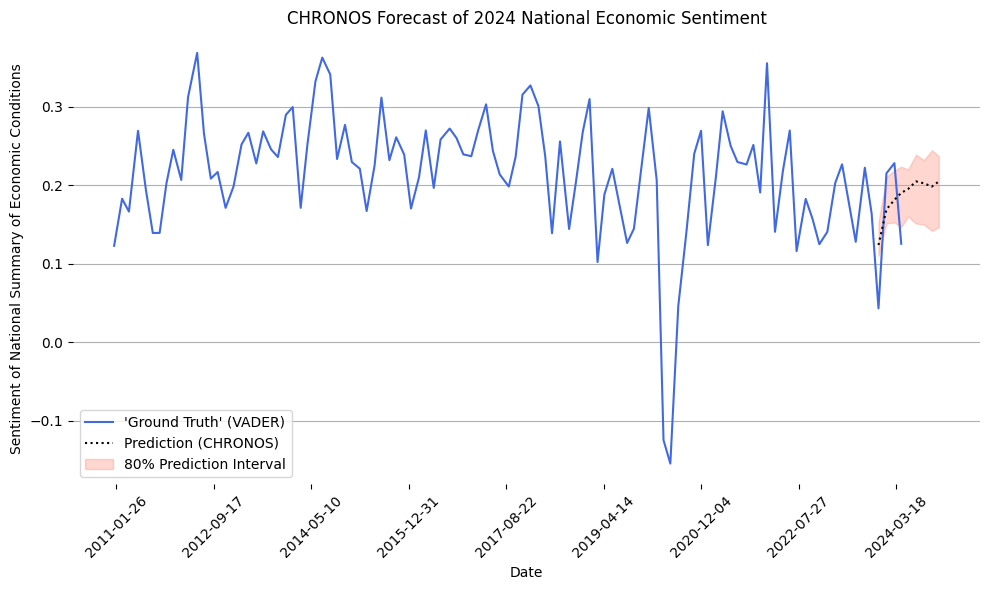

In [ ]:
import torch
from chronos import ChronosPipeline

forecast_dates = [
    "2023-11-29",
    "2024-01-17",
    "2024-03-06",
    "2024-04-17",
    "2024-05-29",
    "2024-07-17",
    "2024-09-04",
    "2024-10-23",
    "2024-12-04"
]

pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cuda",
    torch_dtype=torch.bfloat16,
)


context = df["sentiment_score_vader"].values

context = torch.tensor(context, dtype=torch.bfloat16)

prediction_length = 9
forecast = pipeline.predict(
    context,
    prediction_length,
    num_samples=20,                   # Es el número de muestras diferentes que el modelo generará para cada paso de predicción.
    temperature=1.0,
    top_k=50,
    top_p=1.0,
)

'''
Temperature: Un valor bajo hace que el modelo ejecute con valores de alta probabilidad, mientras que un valor alto permitirá una mayor variabilidad en las predicciones. (Generalmente entre 0.5 y 2.0)

Top-k Sampling: El modelo considera las k predicciones más probables al hacer la predicción. (Enteros positivos, como 1, 5, 10, 50, etc.)

Top-p Sampling : PArecido al top-k, pero en lugar de considerar un número fijo de opciones, considera todas las opciones cuyo rango acumulado de probabilidad es menor o igual a p. (Generalmente entre 0.0 y 1.0.)

'''

forecast_index = range(len(df), len(df) + prediction_length)

low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(concat_df['report_date']), concat_df['sentiment_score_vader'], color="royalblue", label="'Ground Truth' (VADER)")
plt.plot(pd.to_datetime(forecast_dates), median, color="black", linestyle='dotted', label="Prediction (CHRONOS)")
plt.fill_between(forecast_dates, low, high, color="tomato", alpha=0.25, label="80% Prediction Interval")

plt.xlabel('Date')
plt.ylabel('Sentiment of National Summary of Economic Conditions')
plt.title('CHRONOS Forecast of 2024 National Economic Sentiment')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.tight_layout()
plt.show()